# WINE QUALITY PROJECT

## 1. Extracción, tratamiento y limpieza de los datos

### · Eleccion del dataset:

    a. https://archive.ics.uci.edu/ml/datasets/Wine+Quality 
    b. Dos dataset, uno de vinos tintos y otro de vinos blancos
    c. Trabajamos primero los dos por separado

In [1]:
# importar numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# cargar red and white wine datasets
red_df = pd.read_csv('../winequality-red.csv', sep=';')
white_df = pd.read_csv('../winequality-white.csv', sep=';')

    Analizamos cada dataset

In [2]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
red_df.shape

(1599, 12)

In [5]:
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
white_df.shape

(4898, 12)

    Ambos datasets tienen las mismas columnas, no tienen nulos, todos sus datos son de tipo numérico. 
    La única diferencia entre ambos es que el data set de white wines tiene mas registros que el de red wines.
    Juntamos ambos dataset, añadiendo una columna mas, "tipo", que tendrá dos categorías, 'red' y 'white' 

    Se le asigna un color a cada fila, de manera que en un dataset serán todos 'rojo' y en el otro serán todos 'blanco'.

    Después de comletar los dos datasets, los juntamos mediante la función de 'append', y los dejamos listos para analizar.

In [8]:
red_df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [9]:
white_df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [10]:
# Asignamos el color a cada row, en un data set red y en otro, white.
color_red = np.repeat('red', red_df.shape[0])

color_white = np.repeat('white', white_df.shape[0])

In [11]:
# Añadimos la columna "color" para albergar el color asignado
red_df['color'] = color_red
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
white_df['color'] = color_white
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [13]:
# Unimos el dataset del vino rojo con el blanco mediante "append" 
wine_df = red_df.append(white_df) 
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [14]:
wine_df.to_csv('winequality_combined.csv', index=False)

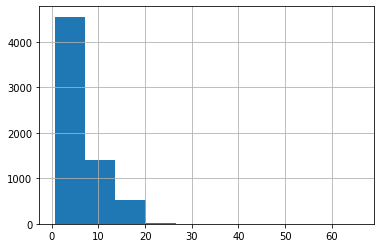

In [15]:
wine_df.residual_sugar.hist();

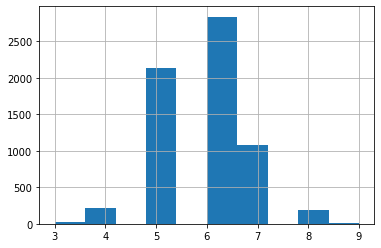

In [16]:
wine_df.quality.hist();

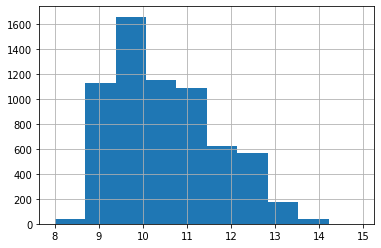

In [17]:
wine_df.alcohol.hist();

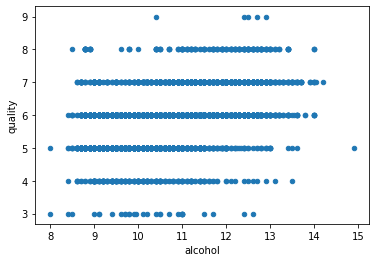

In [18]:
wine_df.plot(x="alcohol", y="quality", kind="scatter");

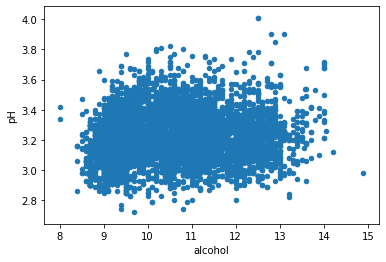

In [19]:
wine_df.plot(x="alcohol", y="pH", kind="scatter");

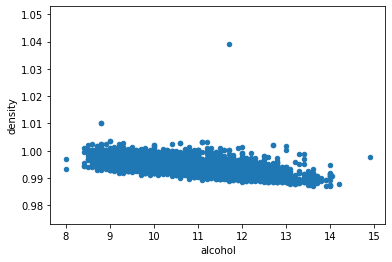

In [20]:
wine_df.plot(x="alcohol", y="density", kind="scatter");

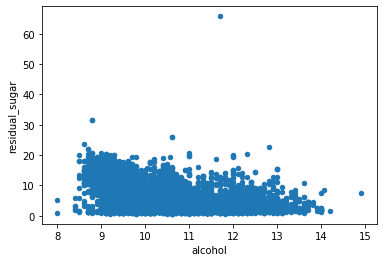

In [21]:
wine_df.plot(x="alcohol", y="residual_sugar", kind="scatter");

In [22]:
wine_df.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

    Para el siguiente análisis, se define la media del alcohol, y se divide entre high y low.

    Trabajando las medias, podemos obtener de manera más directa los análisis entre los diferentes componentes a través de las Bar chart

In [23]:
# Primero defino la media de alcohol, y divido entre high y low
median = wine_df['alcohol'].median()
low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

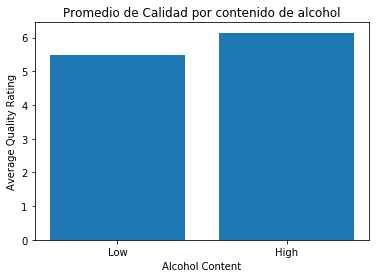

In [24]:
# Bar chart
locations = [1,2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Promedio de Calidad por contenido de alcohol')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

    En esta gráfica, se puede aprecias que el vino con higher alcohol tiene mejor Quality Rating

In [25]:
grouped_wine_color = wine_df.groupby('color')
mean_by_color = grouped_wine_color.mean()
mean_by_color

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


In [26]:
grouped_color_quality = wine_df.groupby('color').mean().quality
grouped_color_quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [27]:
mean_color_alcohol = grouped_wine_color['alcohol'].mean()
mean_color_alcohol

color
red      10.422983
white    10.514267
Name: alcohol, dtype: float64

    En este caso, el vino blanco tiene mejor calidad que el tinto

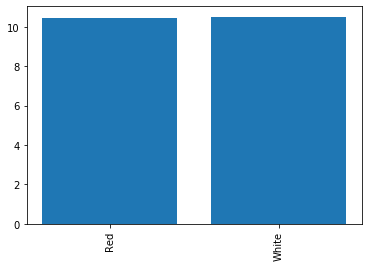

In [28]:
f, ax = plt.subplots()

x = ['Red', 'White']
l = mean_color_alcohol.index
y = mean_color_alcohol.values

ax.bar(l,y)
ax.set_xticks(l)
ax.set_xticklabels(x, rotation='vertical')

plt.show()

    La media de grados de alcohol de los dos vinos es casi igual

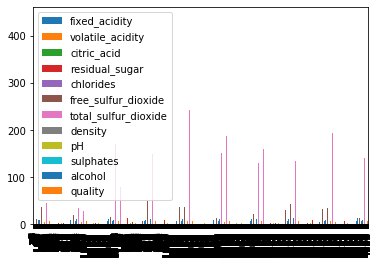

In [29]:
wine_df.plot.bar()

Text(0.5, 1.0, 'alcohol')

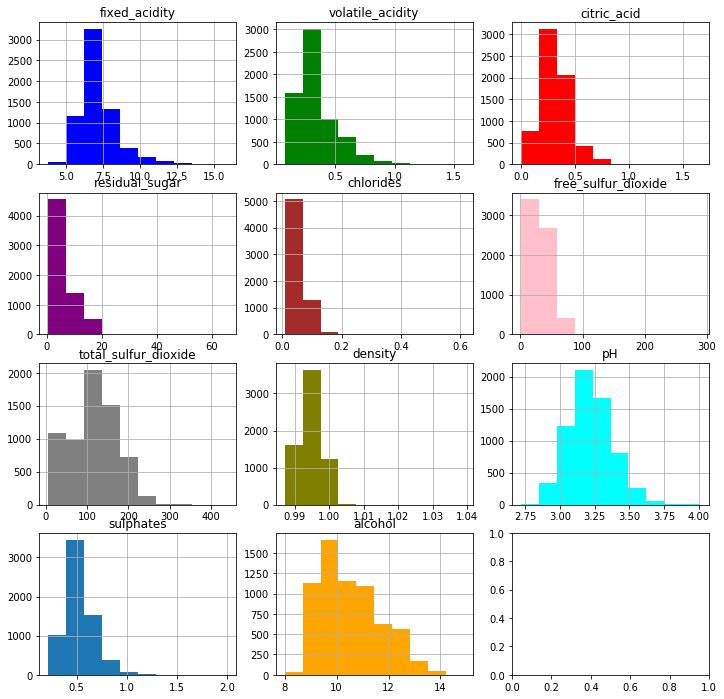

In [35]:
# Histogramas para ver la distribucion de las features numéricas

f, axs = plt.subplots(4,3,figsize=(12,12))

plt.subplot(4, 3, 1)
wine_df['fixed_acidity'].hist(color = 'blue')
plt.title('fixed_acidity')

plt.subplot(4, 3, 2)
wine_df['volatile_acidity'].hist(color = 'green')
plt.title('volatile_acidity')

plt.subplot(4, 3, 3)
wine_df['citric_acid'].hist(color = 'red')
plt.title('citric_acid')

plt.subplot(4, 3, 4)
wine_df['residual_sugar'].hist(color = 'purple')
plt.title('residual_sugar')

plt.subplot(4, 3, 5)
wine_df['chlorides'].hist(color = 'brown')
plt.title('chlorides')

plt.subplot(4, 3, 6)
wine_df['free_sulfur_dioxide'].hist(color = 'pink')
plt.title('free_sulfur_dioxide')

plt.subplot(4, 3, 7)
wine_df['total_sulfur_dioxide'].hist(color = 'gray')
plt.title('total_sulfur_dioxide')

plt.subplot(4, 3, 8)
wine_df['density'].hist(color = 'olive')
plt.title('density')

plt.subplot(4, 3, 9)
wine_df['pH'].hist(color = 'cyan')
plt.title('pH')

plt.subplot(4, 3, 10)
wine_df['sulphates'].hist()
plt.title('sulphates')

plt.subplot(4, 3, 11)
wine_df['alcohol'].hist(color = 'orange')
plt.title('alcohol')